In [19]:
# imports

import skimage
from skimage import io, exposure
from skimage.filters import threshold_local
import imshowpair

import numpy as np
import matplotlib.pyplot as plt

from skimage.util import img_as_ubyte
from skimage import data
from skimage.color import rgb2gray

from skimage.draw import rectangle_perimeter, set_color

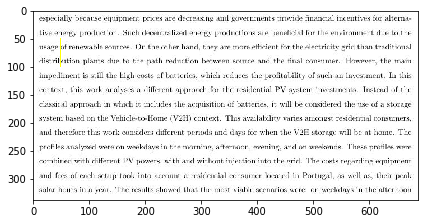

In [23]:
# the 2o argument (e.g. np.float64) converts rgb image to grayscale

image = io.imread('images/example_0.jpg')
# image = io.imread('images/teste.jpg', np.float64)

start = (50, 50)
end   = (100, 100)
r, c = rectangle_perimeter(start, end=end)

image[r, c] = (255, 255, 0)
# set_color(image, (r,c), (255,255,0))

io.imshow(image)
plt.show()
io.imsave('images/example_0_mod.jpg', image)

# assure pixels are represented in 0-255 range
# image = img_as_ubyte(image)

# io.imshow(rgb2gray(image))


threshold = 240
image_bin = image > threshold

# block_size = 11
# image_bin = threshold_local(image, block_size, offset=40)


# plt.show()

# imshowpair.imshowpair(image, image_bin, cmap='gray')
# plt.show()

In [27]:
# Algorithm

th = 0.2 # 0 to 1
min_sth = 5

px_rows = image_bin.shape[0]
px_cols = image_bin.shape[1]

text_lines = 0
sth = 0 # something

# for every pixel row
for row in range(0, px_rows):

    bpxs = 0 # black
    wpxs = 0 # white

    # for every pixel column
    for col in range(0, px_cols):
        if image_bin[row][col] == 0:
            # black
            bpxs = bpxs + 1
        else:
            # white
            wpxs = wpxs + 1

    # print(bpxs/px_cols)

    if bpxs/px_cols >= th:
        sth = sth + 1

    elif sth >= min_sth:
        # a text line was identified
        text_lines = text_lines + 1
        sth = 0

    # next pixel row or finished


print(text_lines)

13
